 Se le propone a un grupo de niños y niñas una actividad: construir torres lo más altas po-
sible usando bloques cúbicos y cilíndricos. Se registran en https://github.com/franciscokordon/estainferencia/blob/main/data/blocks.csv las edades de los infantes, el número de bloques y el
tiempo empleado. En este problema, solo consideramos el número de bloques utilizados y las
edades.
- (a) Graficar el número de bloques y vs las edades x. A partir del gráfico, proponer un MLG.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

path = "./blocks.csv"
df = pd.read_csv(path, delimiter=',')

In [2]:
df.head()

,Unnamed: 0,Child,Number,Time,Trial,Shape,Age
0,0,A,11,30.0,1,Cube,4.67
1,1,B,9,19.0,1,Cube,5.00
2,2,C,8,18.6,1,Cube,4.42
3,3,D,9,23.0,1,Cube,4.33
4,4,E,10,29.0,1,Cube,4.33


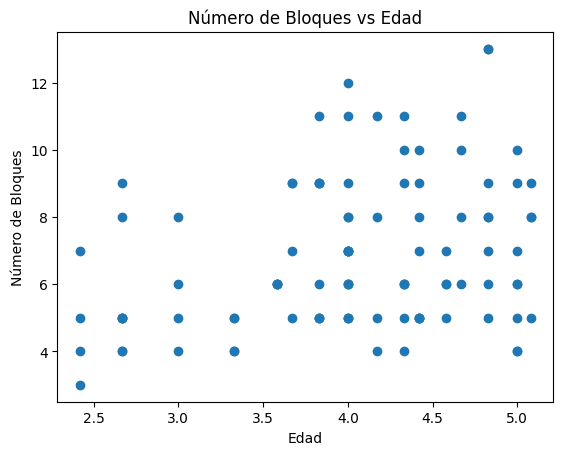

                            OLS Regression Results                            
Dep. Variable:                 Number   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     10.57
Date:                Wed, 02 Oct 2024   Prob (F-statistic):            0.00158
Time:                        16:10:05   Log-Likelihood:                -216.51
No. Observations:                 100   AIC:                             437.0
Df Residuals:                      98   BIC:                             442.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0578      1.177      2.599      0.0

In [3]:
# Graficar el número de bloques (y) vs las edades (x)
plt.scatter(df['Age'], df['Number'])
plt.xlabel('Edad')
plt.ylabel('Número de Bloques')
plt.title('Número de Bloques vs Edad')
plt.show()

# Proponer un Modelo Lineal Generalizado (MLG) USANDO STATSMODELS.API (not good)
import statsmodels.api as sm

X = df['Age']
y = df['Number']
X = sm.add_constant(X)  # Agregar una constante para el intercepto

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

- (b) Ajustar este MLG, es decir, encontrar estimaciones puntuales para los parámetros de regresión β.


- Para ajustar un modelo de regresión lineal usando Mínimos Cuadrados, necesitas resolver el sistema 
𝛽
^
=
(
𝑋
𝑇
𝑋
)
^−
1
𝑋
^𝑇
𝑦

 y, donde 
𝑋
 es la matriz de diseño.


In [4]:
# ppropongo como distribucion de error una Poisson
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(model.summary())

# encontrar las estimaciones puntuales de los parametreos
print(model.params)



                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Number   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -217.82
Date:                Wed, 02 Oct 2024   Deviance:                       62.244
Time:                        16:10:05   Pearson chi2:                     64.5
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06933
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3447      0.222      6.048      0.0

In [5]:
# hago lo mismo sin libreriass
X = df['Age']
y = df['Number']

# Ajustar el modelo
n = len(X)
X = np.c_[np.ones(n), X] # Agregar una constante para el intercepto
beta = np.linalg.inv(X.T @ X) @ X.T @ y # beta = (X^T X)^-1 X^T y

# Mostrar los parámetros estimados

b0 =  1.3446995890202804
b1 =  0.1415095443010225


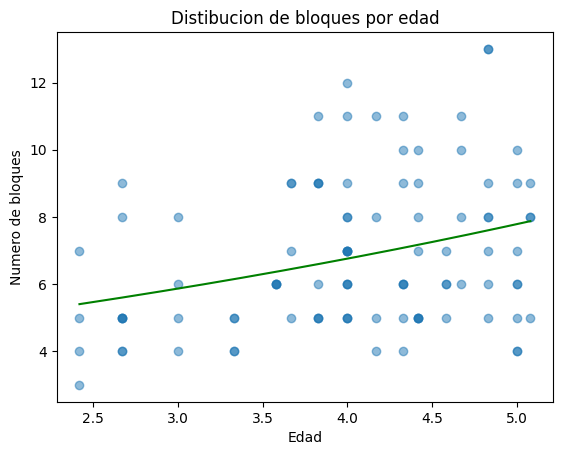

In [6]:
def neg_log_likelihood_poisson(beta, X, Y):
    mu_ = np.exp(np.dot(X, beta))  # El parámetro lambda (mu) es exp(X * beta)
    return -np.sum(Y * np.log(mu_) - mu_)  # Devuelve la log-verosimilitud negativa


from scipy.optimize import minimize

X,Y = df["Age"], df["Number"]

intercept = np.ones(X.shape)
X_with_intercept = np.column_stack((intercept,X))

initial_beta = np.zeros(X_with_intercept.shape[1])
res_poisson = minimize(neg_log_likelihood_poisson, initial_beta, args=(X_with_intercept, Y))

b0 = res_poisson.x[0]
b1 = res_poisson.x[1]

print('b0 = ', b0)
print('b1 = ', b1)

x_range = np.linspace(X.min(), X.max(), 300)
poisson_fit = np.exp(b0 + b1 * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.5)
ax.plot(x_range,poisson_fit,color='g')
ax.set_xlabel("Edad")
ax.set_ylabel("Numero de bloques")
ax.set_title("Distibucion de bloques por edad")
plt.show()

- (c) Determinar el error estándar de cada parámetro de regresión.

Forma simplificada by GPT

In [7]:
# Calcular la matriz de covarianza de los parámetros estimados
cov_matrix = np.linalg.inv(X_with_intercept.T @ np.diag(np.exp(X_with_intercept @ res_poisson.x)) @ X_with_intercept)

# Los errores estándar son la raíz cuadrada de los elementos diagonales de la matriz de covarianza
standard_errors = np.sqrt(np.diag(cov_matrix))

print('Errores estándar de los parámetros de regresión:')
print('SE(b0) = ', standard_errors[0])
print('SE(b1) = ', standard_errors[1])

Errores estándar de los parámetros de regresión:
SE(b0) =  0.22235367633510356
SE(b1) =  0.05340040219094002


fORMA DETALAL

In [10]:
from numpy.linalg import inv

mu = np.exp(X_with_intercept@res_poisson.x)


W = np.diag(mu) # Matriz diagonal con los valores de mu en la diagonal (pesos)


I = X_with_intercept.T@W@X_with_intercept
cov_matrix = inv(I)
print(cov_matrix)


se_b0 = np.sqrt(cov_matrix[0,0])
se_b1 = np.sqrt(cov_matrix[1,1])
print("se(b0) =",se_b0)
print("se(b1) =",se_b1)


[[ 0.04944116 -0.01169638]
 [-0.01169638  0.0028516 ]]
se(b0) = 0.22235367633510356
se(b1) = 0.05340040219094002
